<a href="https://www.kaggle.com/code/ameau01/uber-fare-prediction?scriptVersionId=236999869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CSCA-5622: Supervised Machine Learning - Final Project #


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/Uber1.jpg" alt="." width="300">

## Uber Fare Prediction ##
### - Predict Uber Fares Using Machine Learning on Time Series Data ###
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5622-final-project/tree/main](https://github.com/alme9155/csca-5622-final-project/tree/main)  
---

## I. Project Description ##

This is the final project of CSCA-5622: Supervised Learning Algorithms in Machine Learning.

### Topic: **Predict Uber Fares Using Machine Learning on Time Series Data.** ###

### I.i. Objective: ####

This project aims to evaluate the performance of various machine learning algorithms, including Linear Regression, Random Forest, and Gradient Boosting, when applied to time series data. By adapting supervised learning methods on the Uber fare dataset, this experimental analysis lays the foundation for understanding autoregression, a time series technique to be explored in future projects.

### I.ii. Background ####

What is **time series** data?

**Time series data** is a sequence of data points collected over time, where each point is associated with a specific timestamp. The key characteristic is that the order of the data points matters, as they are recorded sequentially at particular intervals (e.g., hourly, daily, monthly). Common examples include stock prices, and weather measurements. Using regression on time series data often involves modeling how past events or patterns to predict future event occurrences.

### I.iii. Project Significance ###

This project aims to answer this question: 

**Can supervised learning methods be effectively used to predict future events based on historical data?** 

This study seeks to explore the challenges of adapting machine learning techniques to time-series data, evaluate the relative performance of various models, and analyze the underlying factors influencing their effectiveness

### I.iv. Machine Learning used in this project: ###

* Linear Regression
* Random Forest
* Gradient Boosting

### Dataset: ###

"Uber Fares Dataset" from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).


## II. Dataset Description: ##

The Uber Fares Dataset from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset) contains over 200,000 records of uber trip data collected from Uber API. Each row in the Uber fares dataset captures details such as the fare amount, pickup and dropoff times, locations, and passenger count.

### Columns: ###

- **key** : a unique identifier for each trip
- **fare_amount** : the cost of each trip in usd
- **pickup_datetime** : date and time when the meter was engaged
- **passenger_count** : the number of passengers in the vehicle (driver entered value)
- **pickup_longitude** : the longitude where the meter was engaged
- **pickup_latitude** : the latitude where the meter was engaged
- **dropoff_longitude** : the longitude where the meter was disengaged
- **dropoff_latitude** : the latitude where the meter was disengaged


## III. Exploratory Data Analysis ##

### III.i.Loading the data from Kaggle ###
This notebook require internet connection to access dataset from the kaggle dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# loading the data
data = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
data = data.drop("Unnamed: 0", axis=1)

print(f"Data loaded successfully.")

/kaggle/input/uber-fares-dataset/uber.csv
Data loaded successfully.


### III.ii.Exploring and understanding the data ###

Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [2]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nINF, -INF values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB
None

DataSet Shape:
--------------------------
Data Shape: 200000 Rows x 8 Columns

First five rows of training data:
--------------------------


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



NaN values in dataset:
--------------------------
NaN values in dataset:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

INF, -INF values in dataset:
--------------------------
NaN values in dataset:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,pickup_longitude,3786,1.89%
1,pickup_latitude,3782,1.89%
2,dropoff_longitude,3764,1.88%
3,dropoff_latitude,3758,1.88%
4,passenger_count,709,0.35%
5,fare_amount,5,0.0%


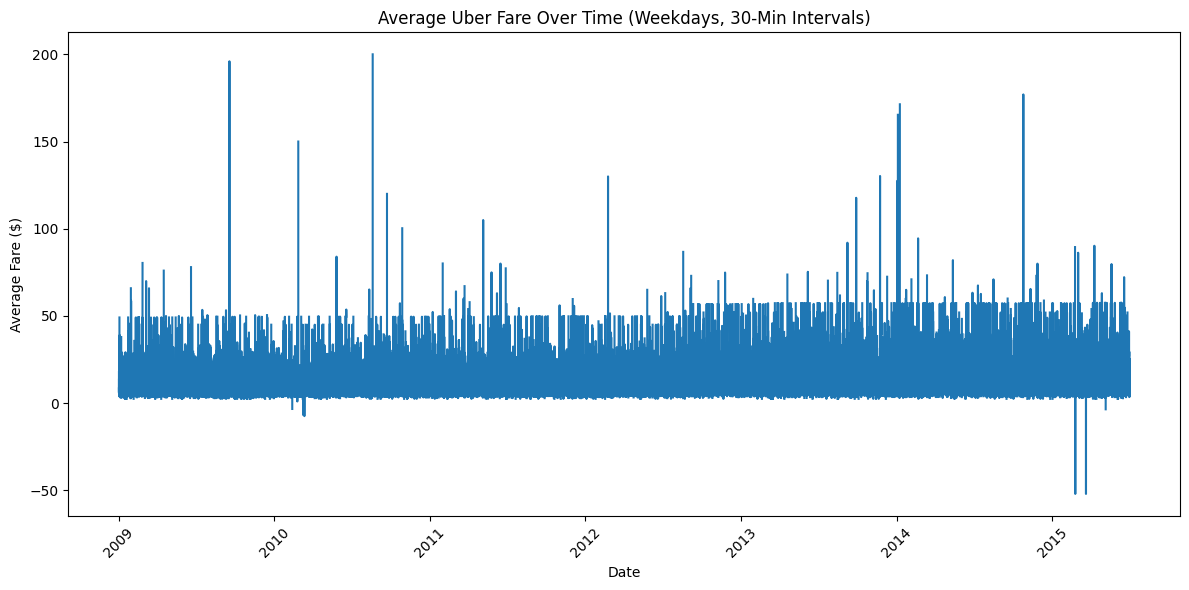

In [3]:
# Plot average uber fare on weekdays
import warnings
# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekday = data[data['pickup_datetime'].dt.dayofweek < 5]
data_agg = data_weekday.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekdays, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

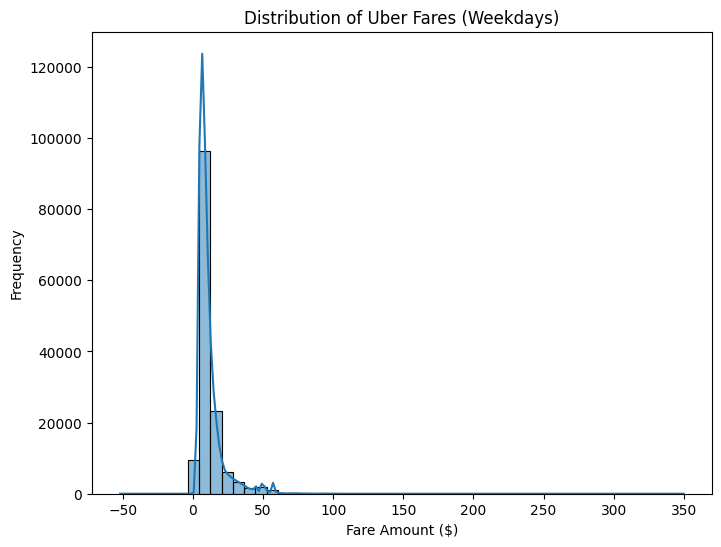

In [4]:
# Plot of distribution of uber fares on weekdays (Mon-Fri)
plt.figure(figsize=(8, 6))
sns.histplot(data_weekday['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

### III.iii. EDA summary ###

This dataset has 114,800 rows and 22 columns.

The dataset typically includes features like:

* **Track metadata:** track_name, artists, album_name, track_id
* **Audio features:** danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms
* **Popularity:** popularity (a score from 0 to 100, where higher values indicate more popular tracks)
* **Genre:** track_genre

There are no missing values (NaN) in numeric values columns, such as "popularity", "energy", etc.
Confirmed with the skewed distribution in histogram, "Popularity" has 16,020 rows with zero values.

### EDA Analysis and Modeling Strategy

* Even though there are over 100,000 tracks in the Spotify dataset, a significant number of songs (14%) have a popularity score of 0, and most songs have low popularity scores (<20).
* Having a large volume of non-popular songs increases the challenge of unsupervised learning, as clusters might be dominated by non-hit songs.
* By analyzing the top 1% (viral songs) and top 10% (popular songs), we found that features like danceability, energy, valence, and loudness increase for hit songs.
* There are a number of features, such as danceability, energy, valence, and loudness, that have a positive relationship with the popularity of songs.
* The unscaled bar plot was misleading due to scale differences, so we need to scale the data before modeling.
* We need to focus on high-impact features like danceability, energy, valence, acousticness, and loudness for clustering and modeling.

In [5]:
import numpy as np
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])

### III.iii. EDA summary ###

This dataset has 114,800 rows and 22 columns.

The dataset typically includes features like:

* **Track metadata:** track_name, artists, album_name, track_id
* **Audio features:** danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms
* **Popularity:** popularity (a score from 0 to 100, where higher values indicate more popular tracks)
* **Genre:** track_genre

There are no missing values (NaN) in numeric values columns, such as "popularity", "energy", etc.
Confirmed with the skewed distribution in histogram, "Popularity" has 16,020 rows with zero values.

### EDA Analysis and Modeling Strategy

* Even though there are over 100,000 tracks in the Spotify dataset, a significant number of songs (14%) have a popularity score of 0, and most songs have low popularity scores (<20).
* Having a large volume of non-popular songs increases the challenge of unsupervised learning, as clusters might be dominated by non-hit songs.
* By analyzing the top 1% (viral songs) and top 10% (popular songs), we found that features like danceability, energy, valence, and loudness increase for hit songs.
* There are a number of features, such as danceability, energy, valence, and loudness, that have a positive relationship with the popularity of songs.
* The unscaled bar plot was misleading due to scale differences, so we need to scale the data before modeling.
* We need to focus on high-impact features like danceability, energy, valence, acousticness, and loudness for clustering and modeling.

## I. Future Work ##

Mention something about nature of data is time-series
